<a href="https://colab.research.google.com/github/maskmo/igb-project/blob/Milestone-2/Milestone2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
x_data = pd.read_csv('/content/train.csv', index_col='Id')
x_test = pd.read_csv('/content/test.csv', index_col='Id')


cat_col_list = []
for col in x_data.columns:
    if x_data[col].dtype not in ['float', 'int']:
        cat_col_list.append(col)
num_col = x_data.columns.drop(cat_col_list)
cat_col = x_data.columns.drop(num_col)

x_data = x_data[num_col].dropna()

y = x_data.SalePrice
x_data.drop(['SalePrice'], axis=1, inplace=True)
num_col = num_col.drop('SalePrice')

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# numerical_transformer = SimpleImputer(strategy='constant')

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, num_col),
#         ('cat', categorical_transformer, cat_col)
#     ])

model = RandomForestRegressor()

# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('model', model)
#                      ])

model.fit(x_train, y_train)

RandomForestRegressor()

MAE: 17650.8212


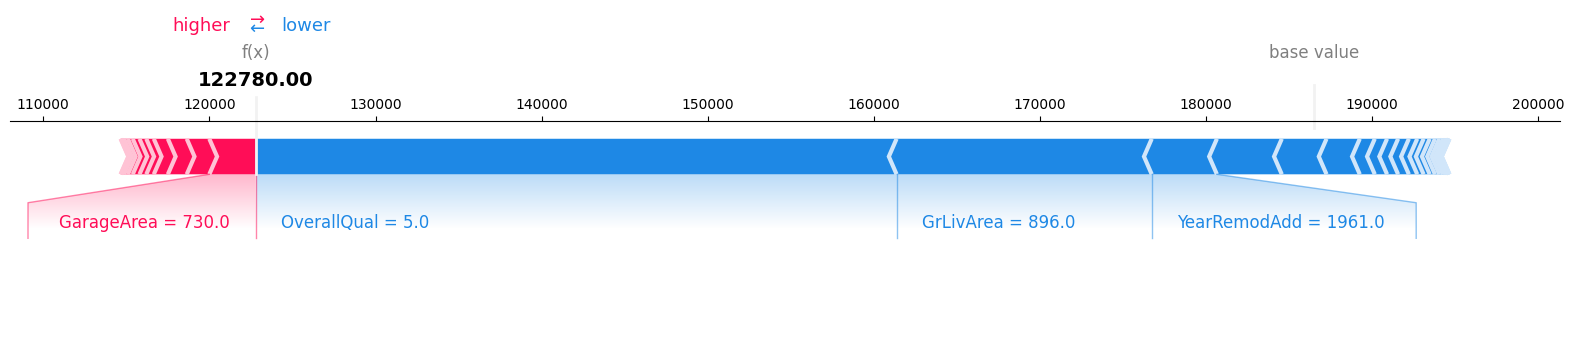

In [ ]:
preds = model.predict(x_valid)

print('MAE:', mean_absolute_error(y_valid, preds))
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test[num_col])

shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    x_test[num_col].iloc[0,:],
    matplotlib=True
)

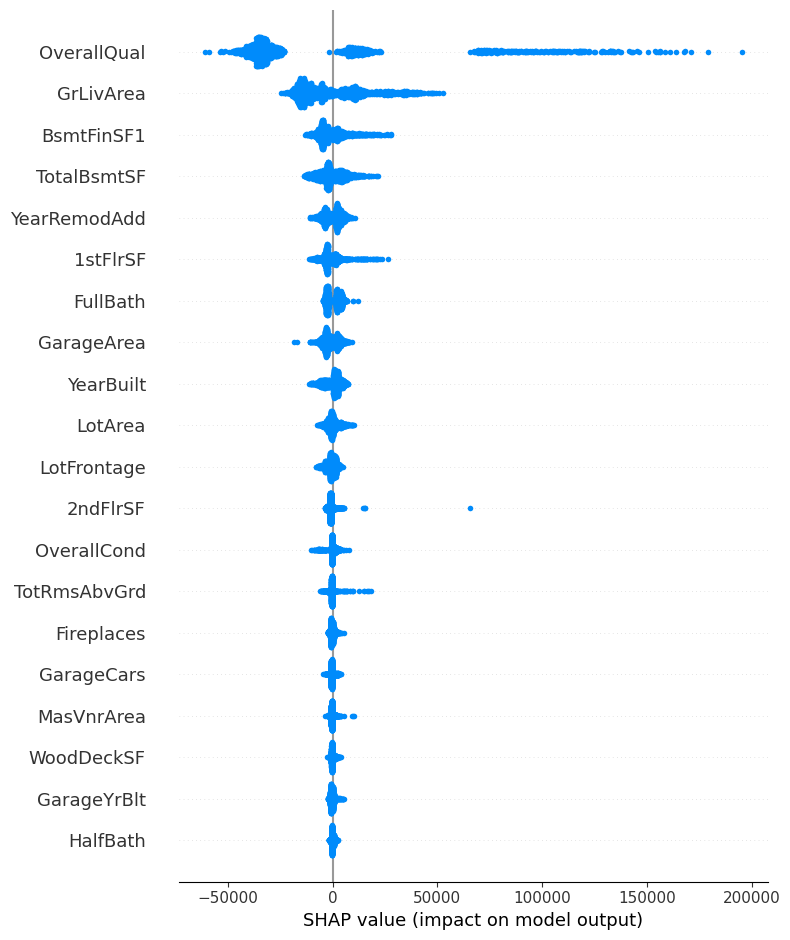

In [ ]:
shap.summary_plot(shap_values,
                  features = num_col)

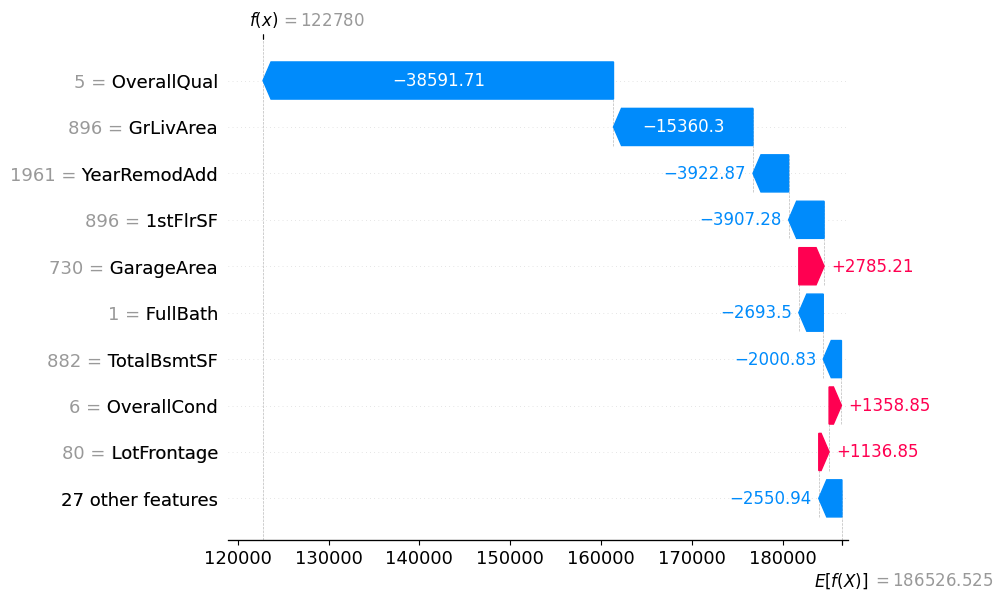

In [ ]:
sv = explainer(x_test[num_col])

exp = Explanation(sv.values,
                  sv.base_values[0][0],
                  data=x_test[num_col].values,
                  feature_names=num_col)

shap.plots.waterfall(exp[0])

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)